n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |       92 |     17 |  1.121323E+02 |  3.304505E+02
     2 |      184 |     16 |  1.121323E+02 |  2.777545E+02
     3 |      276 |     21 |  8.781685E+01 |  3.054316E+02
     4 |      368 |     22 |  8.781685E+01 |  2.602599E+02
     5 |      460 |     26 |  7.699036E+01 |  2.210218E+02
     6 |      552 |     22 |  3.649811E+01 |  1.837982E+02
     7 |      644 |     14 |  3.498867E+01 |  1.775318E+02
     8 |      736 |     13 |  3.429621E+01 |  1.481864E+02
     9 |      828 |     14 |  3.429621E+01 |  1.190207E+02
    10 |      920 |     17 |  3.429621E+01 |  9.200521E+01
    11 |     1012 |     12 |  3.148895E+01 |  1.127968E+02
    12 |     1104 |     13 |  3.346168E+01 |  1.088639E+02
    13 |     1196 |     11 |  1.646569E+01 |  6.166817E+01
    14 |     1288 |     12 |  1.646569E+01 |  6.365910E+01
    15 |     1380 |      9 |  1.567376E+01 |  5.560997E+01
    16 |     1472 |     10 |  1.089233E+01 |  4.991930E+

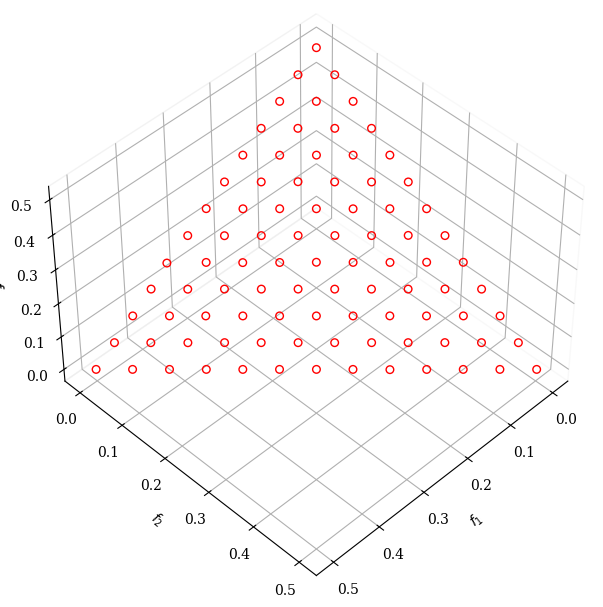

In [6]:
import numpy as np
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

# 1. Setup the Problem
problem = get_problem("dtlz1", n_var=7, n_obj=3)

# 2. Create Reference Directions (Crucial for NSGA-III)
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)

# 3. Initialize the Algorithm
algorithm = NSGA3(pop_size=92, ref_dirs=ref_dirs)

res = minimize(problem,
               algorithm,
               seed=1,
               termination=('n_gen', 600),
               verbose=True)

plot = Scatter(tight_layout=True)
plot.add(res.F, s=30, facecolors='none', edgecolors='r')
plot.show()

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      455 |     29 |  0.000000E+00 |  0.9787918362 |             - |             -
     2 |      910 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0129851881 |         ideal
     3 |     1365 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0106370473 |         ideal
     4 |     1820 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0492055595 |         ideal
     5 |     2275 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0102794289 |         nadir
     6 |     2730 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0041947767 |         ideal
     7 |     3185 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0156247707 |         ideal
     8 |     3640 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0198702878 |         nadir
     9 |     4095 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0095413604 |             f
    10 |     4550 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0079404405 |         ideal

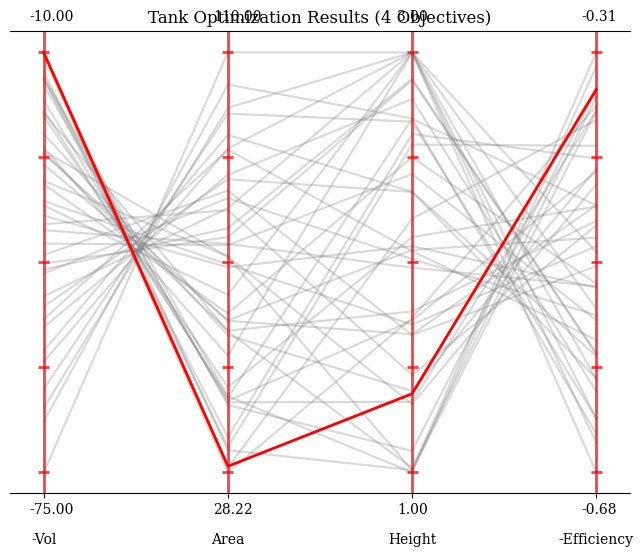

In [5]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.termination import get_termination
from pymoo.visualization.pcp import PCP

# 1. Define the Custom Tank Problem
class AdvancedTankProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=4, n_ieq_constr=1, 
                         xl=np.array([1.0, 1.0, 1.0]), 
                         xu=np.array([5.0, 5.0, 3.0]))

    def _evaluate(self, x, out, *args, **kwargs):
        L, W, H = x[0], x[1], x[2]
        
        # Objectives (Pymoo always MINIMIZES, so we use negative for Maximization)
        f1 = -(L * W * H)               # Maximize Volume
        f2 = 2 * (L*W + L*H + W*H)      # Minimize Surface Area
        f3 = H                          # Minimize Height
        f4 = -( (L*W*H) / (2*(L*W + L*H + W*H)) ) # Maximize efficiency (Vol/Area)

        # Constraint: Volume must be >= 10 (g <= 0 format)
        g1 = 10 - (L * W * H)

        out["F"] = [f1, f2, f3, f4]
        out["G"] = [g1]

# 2. Setup Reference Directions (Key for 4 objectives)
ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=12)

# 3. Initialize NSGA-III
problem = AdvancedTankProblem()
algorithm = NSGA3(pop_size=455, ref_dirs=ref_dirs)

# 4. Run Optimization
res = minimize(problem,
               algorithm,
               termination=get_termination("n_gen", 400),
               seed=1,
               verbose=True)

# 5. Visualize with a Parallel Coordinate Plot (Best for 4+ objectives)
print("Best Design Variables (L, W, H):", res.X[0])
plot = PCP(title=("Tank Optimization Results (4 Objectives)"), labels=['-Vol', 'Area', 'Height', '-Efficiency'])
plot.add(res.F, color="grey", alpha=0.3)
plot.add(res.F[0], color="red", linewidth=2) # Highlight one optimal design
plot.show()

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      455 |     29 |  0.000000E+00 |  0.9787918362 |             - |             -
     2 |      910 |     37 |  0.000000E+00 |  0.000000E+00 |  0.0129851881 |         ideal
     3 |     1365 |     38 |  0.000000E+00 |  0.000000E+00 |  0.0106370473 |         ideal
     4 |     1820 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0492055595 |         ideal
     5 |     2275 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0102794289 |         nadir
     6 |     2730 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0041947767 |         ideal
     7 |     3185 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0156247707 |         ideal
     8 |     3640 |     39 |  0.000000E+00 |  0.000000E+00 |  0.0198702878 |         nadir
     9 |     4095 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0095413604 |             f
    10 |     4550 |     41 |  0.000000E+00 |  0.000000E+00 |  0.0079404405 |         ideal

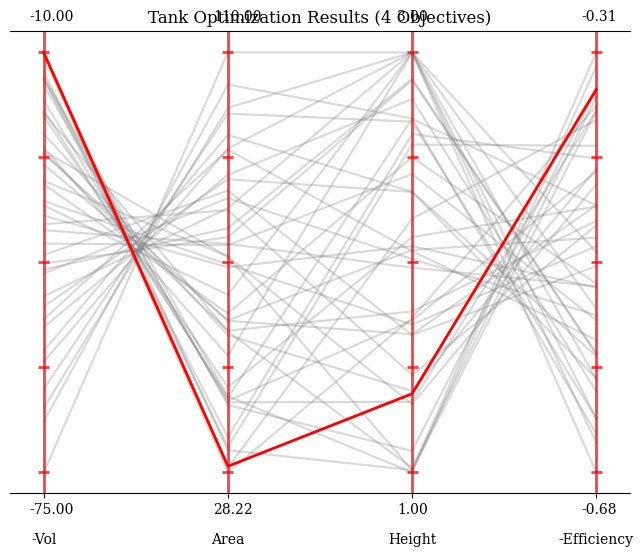

In [4]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.termination import get_termination
from pymoo.visualization.pcp import PCP

# 1. Define the Custom Tank Problem
class AdvancedTankProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3, n_obj=4, n_ieq_constr=1, 
                         xl=np.array([1.0, 1.0, 1.0]), 
                         xu=np.array([5.0, 5.0, 3.0]))

    def _evaluate(self, x, out, *args, **kwargs):
        L, W, H = x[0], x[1], x[2]
        
        # Objectives (Pymoo always MINIMIZES, so we use negative for Maximization)
        f1 = -(L * W * H)               # Maximize Volume
        f2 = 2 * (L*W + L*H + W*H)      # Minimize Surface Area
        f3 = H                          # Minimize Height
        f4 = -( (L*W*H) / (2*(L*W + L*H + W*H)) ) # Maximize efficiency (Vol/Area)

        # Constraint: Volume must be >= 10 (g <= 0 format)
        g1 = 10 - (L * W * H)

        out["F"] = [f1, f2, f3, f4]
        out["G"] = [g1]

# 2. Setup Reference Directions (Key for 4 objectives)
ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=12)

# 3. Initialize NSGA-III
problem = AdvancedTankProblem()
algorithm = NSGA3(pop_size=455, ref_dirs=ref_dirs)

# 4. Run Optimization
res = minimize(problem,
               algorithm,
               termination=get_termination("n_gen", 400),
               seed=1,
               verbose=True)

# 5. Visualize with a Parallel Coordinate Plot (Best for 4+ objectives)
print("Best Design Variables (L, W, H):", res.X[0])
plot = PCP(title=("Tank Optimization Results (4 Objectives)"), labels=['-Vol', 'Area', 'Height', '-Efficiency'])
plot.add(res.F, color="grey", alpha=0.3)
plot.add(res.F[0], color="red", linewidth=2) # Highlight one optimal design
plot.show()

In [5]:
import os
print(os.getcwd())


C:\Users\Pradip


In [7]:
import os
os.chdir("E:/NCSU Spring '26/Python")
print(f"Current Directory: {os.getcwd()}")

Current Directory: E:\NCSU Spring '26\Python


In [1]:
import os
print(os.getcwd())


C:\Users\Pradip
